# Mass Transports

Transport diagnostics for flow through major straits.

## Theory

Formally, mass transports are given by
$$T_x = \rho u  $$
$$T_y = \rho v  $$

Mass transports are diagnostics that are calculated online by the model:

|variable|long name|units|dimensions|
|-|
|tx_trans|T-cell i-mass transport|Sv|(time,st_ocean,xu_ocean,yt_ocean)|
|ty_trans|T-cell j-mass transport|Sv|(time,st_ocean,xt_ocean,yu_ocean)|


These variables are saved in `ocean.nc` files.

In [14]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Calculation

In [102]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats
from dask.distributed import Client
from glob import glob as gb

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
# cc.start_cluster()
client = Client()
client

Client Scheduler: tcp://127.0.0.1:42375 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 33.67 GB


In [3]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [101]:
input_path_obs = '/g/data/e14/erd561/IMOS/'

input_path_mod = '/g/data/e14/erd561/access-om2/'

In [103]:
data_folder = \
'IMOS_-_Australian_Bluewater_Observing_System_(ABOS)_Facility_-_Current_velocity_time-series_source_files/'

data_name = \
'IMOS_ABOS-DA_AETVZ_*ITFTSL_FV01_ITFTSL-*.nc'

data_name_list = sorted(gb(input_path_obs + data_folder + data_name))

for name in data_name_list:
    print(name)
    
    if name == data_name_list[0]:
        UCUR = xr.open_dataset(name).UCUR.drop('LATITUDE').drop('LONGITUDE').interp(HEIGHT_ABOVE_SENSOR=arange(-600,0,10))
        
    else:
        UCUR = xr.concat([UCUR, xr.open_dataset(name).UCUR.drop('LATITUDE').drop('LONGITUDE').interp(HEIGHT_ABOVE_SENSOR=arange(-600,0,10))], dim='TIME')
        
    print(UCUR)

/g/data/e14/erd561/IMOS/IMOS_-_Australian_Bluewater_Observing_System_(ABOS)_Facility_-_Current_velocity_time-series_source_files/IMOS_ABOS-DA_AETVZ_20110613T072627Z_ITFTSL_FV01_ITFTSL-2011-WORKHORSE-ADCP-128_END-20120927T204950Z_C-20141016T011004Z.nc
<xarray.DataArray 'UCUR' (TIME: 11830, HEIGHT_ABOVE_SENSOR: 61, LATITUDE: 1, LONGITUDE: 1)>
array([[[[nan]],

        ...,

        [[nan]]],


       ...,


       [[[nan]],

        ...,

        [[nan]]]])
Coordinates:
  * TIME                 (TIME) datetime64[ns] 2011-05-26T04:06:39.410000896 ... 2012-09-30T23:18:43.410003200
  * HEIGHT_ABOVE_SENSOR  (HEIGHT_ABOVE_SENSOR) float64 -600.0 -590.0 ... 0.0
Dimensions without coordinates: LATITUDE, LONGITUDE
Attributes:
    name:                        UCUR
    comment:                     magneticDeclination: Data initially referrin...
    magnetic_declination:        2.3830875645187017
    compass_correction_applied:  2.3830875645187017
    standard_name:               eastward_sea_water_

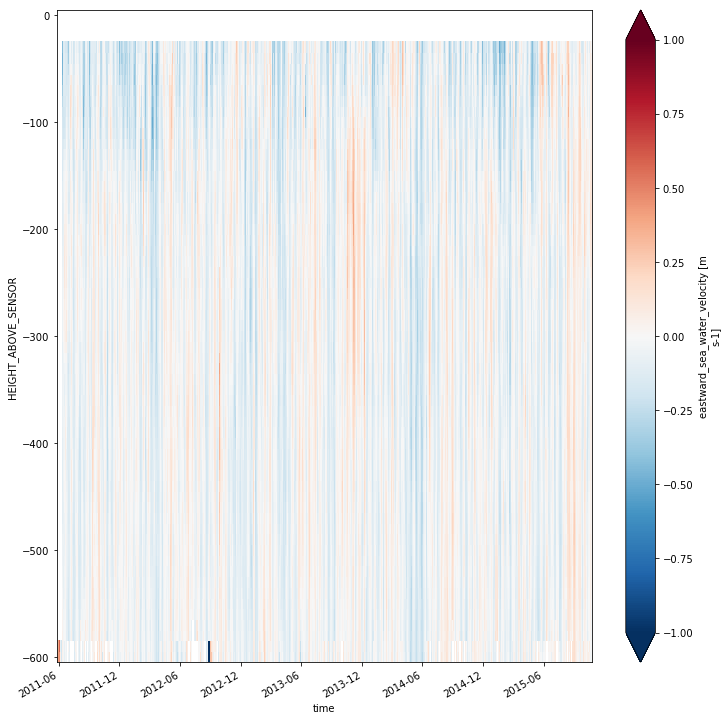

In [114]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

UCUR_plot = UCUR.sortby('TIME').T
UCUR_plot.plot(figsize=(12,12), vmax=1)

savefigure('timeseries')

In [111]:
UCUR.groupby('TIME.season').mean('TIME')

<xarray.DataArray 'UCUR' (season: 4, HEIGHT_ABOVE_SENSOR: 61, LATITUDE: 1, LONGITUDE: 1)>
array([[[[-0.019626]],

        ...,

        [[      nan]]],


       ...,


       [[[-0.009447]],

        ...,

        [[      nan]]]])
Coordinates:
  * HEIGHT_ABOVE_SENSOR  (HEIGHT_ABOVE_SENSOR) float64 -600.0 -590.0 ... 0.0
  * season               (season) object 'DJF' 'JJA' 'MAM' 'SON'
Dimensions without coordinates: LATITUDE, LONGITUDE

In [73]:
data_folder = \
'IMOS_-_Australian_Bluewater_Observing_System_(ABOS)_Facility_-_Current_velocity_time-series_source_files/'

data_name = \
'IMOS_ABOS-DA_AETVZ_20140410T023000Z_ITFTSL_FV01_ITFTSL-2014-WORKHORSE-ADCP-102_END-20151025T082433Z_C-20160622T032504Z.nc'

# obs = xr.open_dataset(input_path_obs + data_folder + data_name).UCUR.assign_coords(LATITUDE=).assign_coords('LONGITUDE')
obs = xr.open_dataset(input_path_obs + data_folder + data_name).UCUR
# obs = xr.open_mfdataset(input_path_obs + data_folder + data_name, concat_dim='new')
# obs = xr.open_mfdataset(input_path_obs + data_folder + data_name, concat_dim=[..., None, ...])

obs.LATITUDE.LONGITUDE.LONGITUDE

<xarray.DataArray 'LONGITUDE' ()>
array(127.3644)
Coordinates:
    LATITUDE   float64 ...
    LONGITUDE  float64 127.4
Attributes:
    standard_name:    longitude
    long_name:        longitude
    units:            degrees_east
    axis:             X
    reference_datum:  WGS84 coordinate reference system
    valid_min:        -180.0
    valid_max:        180.0

In [25]:
data_folder = \
'IMOS_-_Australian_Bluewater_Observing_System_(ABOS)_Facility_-_Current_velocity_time-series_source_files/'

data_name = \
'IMOS_ABOS-DA_AETVZ_*ITFTSL_FV01_ITFTSL-2012*.nc'

obs = xr.open_mfdataset(input_path_obs + data_folder + data_name, coords='all', concat_dim='TIME').UCUR
# obs = xr.open_mfdataset(input_path_obs + data_folder + data_name, concat_dim='new')
# obs = xr.open_mfdataset(input_path_obs + data_folder + data_name, concat_dim=[..., None, ...])

obs

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  coords=coords)


<xarray.DataArray 'UCUR' (TIME: 28425, HEIGHT_ABOVE_SENSOR: 92, LATITUDE: 1, LONGITUDE: 1)>
dask.array<shape=(28425, 92, 1, 1), dtype=float32, chunksize=(14213, 92, 1, 1)>
Coordinates:
  * HEIGHT_ABOVE_SENSOR  (HEIGHT_ABOVE_SENSOR) float64 -600.6 -584.6 ... 224.4
  * LATITUDE             (LATITUDE) float64 -9.273
  * LONGITUDE            (LONGITUDE) float64 127.4
  * TIME                 (TIME) datetime64[ns] 2012-08-26T00:00:59.759995648 ... 2014-04-10T02:55:32.740003328
Attributes:
    name:                 UCUR
    standard_name:        eastward_sea_water_velocity
    long_name:            eastward_sea_water_velocity
    units:                m s-1
    valid_min:            -10.0
    valid_max:            10.0
    ancillary_variables:  UCUR_quality_control

In [15]:
data_folder = \
'IMOS_-_Australian_Bluewater_Observing_System_(ABOS)_Facility_-_Current_velocity_time-series_source_files/'

data_name = \
'IMOS_ABOS-DA_AETVZ_*ITFTSL_FV01_ITFTSL-2014*.nc'

obs = xr.open_mfdataset(input_path_obs + data_folder + data_name, concat_dim='TIME')
# obs = xr.open_mfdataset(input_path_obs + data_folder + data_name, concat_dim='new')
# obs = xr.open_mfdataset(input_path_obs + data_folder + data_name, concat_dim=[..., None, ...])

obs

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  coords=coords)


<xarray.Dataset>
Dimensions:                  (DIST_ALONG_BEAMS: 92, HEIGHT_ABOVE_SENSOR: 92, TIME: 27039)
Coordinates:
  * DIST_ALONG_BEAMS         (DIST_ALONG_BEAMS) float64 -601.0 -585.0 ... 224.5
  * HEIGHT_ABOVE_SENSOR      (HEIGHT_ABOVE_SENSOR) float64 -601.0 ... 224.5
    LATITUDE                 float64 -9.274
    LONGITUDE                float64 127.4
  * TIME                     (TIME) datetime64[ns] 2014-04-10T02:30:00.000006656 ... 2015-10-25T09:25:28
Data variables:
    PITCH                    (TIME) float32 dask.array<shape=(27039,), chunksize=(13519,)>
    PITCH_quality_control    (TIME) float32 dask.array<shape=(27039,), chunksize=(13519,)>
    ROLL                     (TIME) float32 dask.array<shape=(27039,), chunksize=(13519,)>
    ROLL_quality_control     (TIME) float32 dask.array<shape=(27039,), chunksize=(13519,)>
    HEADING                  (TIME) float32 dask.array<shape=(27039,), chunksize=(13519,)>
    HEADING_quality_control  (TIME) float32 dask.array<shape=

In [11]:
data_folder = \
'IMOS_-_Australian_Bluewater_Observing_System_(ABOS)_Facility_-_Current_velocity_time-series_source_files/'

data_name = \
'IMOS_ABOS-DA_AETVZ_*ITFTSL_*.nc'

# obs = xr.open_mfdataset(input_path_obs + data_folder + data_name, concat_dim='TIME')
obs = xr.open_mfdataset(input_path_obs + data_folder + data_name, concat_dim='new')
# obs = xr.open_mfdataset(input_path_obs + data_folder + data_name, concat_dim=[..., None, ...])

obs

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.The datasets supplied require both concatenation and merging. From
xarray version 0.14 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
open_mfda

ValueError: arguments without labels along dimension 'new' cannot be aligned because they have different dimension sizes: {2, 3}

In [7]:
data_folder = \
'IMOS_-_Australian_Bluewater_Observing_System_(ABOS)_Facility_-_Current_velocity_time-series_source_files/'

data_name = \
'IMOS_ABOS-DA_AETVZ_*-128_END-*.nc'

obs = xr.open_mfdataset(input_path_obs + data_folder + data_name, concat_dim='TIME')
# obs = xr.open_mfdataset(input_path_obs + data_folder + data_name, concat_dim='new')
# obs = xr.open_mfdataset(input_path_obs + data_folder + data_name, concat_dim=[..., None, ...])

obs

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


<xarray.Dataset>
Dimensions:                              (HEIGHT_ABOVE_SENSOR: 37, LATITUDE: 1, LONGITUDE: 1, TIME: 11830)
Coordinates:
  * HEIGHT_ABOVE_SENSOR                  (HEIGHT_ABOVE_SENSOR) float32 -24.75 ... -600.75
  * LATITUDE                             (LATITUDE) float64 -9.276
  * LONGITUDE                            (LONGITUDE) float64 127.4
  * TIME                                 (TIME) datetime64[ns] 2011-05-26T04:06:39.410000896 ... 2012-09-30T23:18:43.410003200
Data variables:
    TIME_quality_control                 (TIME) float32 dask.array<shape=(11830,), chunksize=(11830,)>
    HEIGHT_ABOVE_SENSOR_quality_control  (TIME, HEIGHT_ABOVE_SENSOR) float32 dask.array<shape=(11830, 37), chunksize=(11830, 37)>
    LATITUDE_quality_control             (TIME, LATITUDE) float32 dask.array<shape=(11830, 1), chunksize=(11830, 1)>
    LONGITUDE_quality_control            (TIME, LONGITUDE) float32 dask.array<shape=(11830, 1), chunksize=(11830, 1)>
    DEPTH                   

In [8]:
obs

<xarray.Dataset>
Dimensions:                              (HEIGHT_ABOVE_SENSOR: 37, LATITUDE: 1, LONGITUDE: 1, TIME: 11830)
Coordinates:
  * HEIGHT_ABOVE_SENSOR                  (HEIGHT_ABOVE_SENSOR) float32 -24.75 ... -600.75
  * LATITUDE                             (LATITUDE) float64 -9.276
  * LONGITUDE                            (LONGITUDE) float64 127.4
  * TIME                                 (TIME) datetime64[ns] 2011-05-26T04:06:39.410000896 ... 2012-09-30T23:18:43.410003200
Data variables:
    TIME_quality_control                 (TIME) float32 dask.array<shape=(11830,), chunksize=(11830,)>
    HEIGHT_ABOVE_SENSOR_quality_control  (TIME, HEIGHT_ABOVE_SENSOR) float32 dask.array<shape=(11830, 37), chunksize=(11830, 37)>
    LATITUDE_quality_control             (TIME, LATITUDE) float32 dask.array<shape=(11830, 1), chunksize=(11830, 1)>
    LONGITUDE_quality_control            (TIME, LONGITUDE) float32 dask.array<shape=(11830, 1), chunksize=(11830, 1)>
    DEPTH                   

In [9]:
data_folder = \
'IMOS_-_Australian_Bluewater_Observing_System_(ABOS)_Facility_-_Current_velocity_time-series_source_files/'

data_name = \
'IMOS_ABOS-DA_AETVZ_20110613T072627Z_ITFTSL_FV01_ITFTSL-2011-WORKHORSE-ADCP-128_END-20120927T204950Z_C-20141016T011004Z.nc'


obs = xr.open_dataset(input_path_obs + data_folder + data_name)

In [35]:
obs

<xarray.Dataset>
Dimensions:                              (HEIGHT_ABOVE_SENSOR: 37, LATITUDE: 1, LONGITUDE: 1, TIME: 11830)
Coordinates:
  * TIME                                 (TIME) datetime64[ns] 2011-05-26T04:06:39.410000896 ... 2012-09-30T23:18:43.410003200
  * HEIGHT_ABOVE_SENSOR                  (HEIGHT_ABOVE_SENSOR) float32 -24.75 ... -600.75
  * LATITUDE                             (LATITUDE) float64 -9.276
  * LONGITUDE                            (LONGITUDE) float64 127.4
Data variables:
    TIME_quality_control                 (TIME) float32 ...
    HEIGHT_ABOVE_SENSOR_quality_control  (HEIGHT_ABOVE_SENSOR) float32 ...
    LATITUDE_quality_control             (LATITUDE) float32 ...
    LONGITUDE_quality_control            (LONGITUDE) float32 ...
    DEPTH                                (TIME, LATITUDE, LONGITUDE) float32 ...
    DEPTH_quality_control                (TIME, LATITUDE, LONGITUDE) float32 ...
    PRES_REL                             (TIME, LATITUDE, LONGITUDE) f

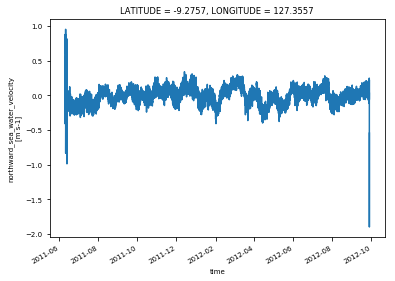

In [29]:
obs.VCUR.T.plot()

In [5]:
trans_Lombok_1 = xr.open_dataset(input_path_mod + 'trans_Lombok_1.nc').trans_Lombok_1/1e6/1036
print(trans_Lombok_1)
trans_Lombok_025 = xr.open_dataset(input_path_mod + 'trans_Lombok_025.nc').trans_Lombok_025/1e6/1036
print(trans_Lombok_025)
trans_Lombok_01 = xr.open_dataset(input_path_mod + 'trans_Lombok_01.nc').trans_Lombok_01/1e6/1036
print(trans_Lombok_01)
trans_Lombok_JRA = xr.open_dataset(input_path_mod + 'trans_Lombok_JRA.nc').trans_Lombok_JRA/1e6/1036
print(trans_Lombok_JRA)

trans_Ombai_1 = xr.open_dataset(input_path_mod + 'trans_Ombai_1.nc').trans_Ombai_1/1e6/1036
print(trans_Ombai_1)
trans_Ombai_025 = xr.open_dataset(input_path_mod + 'trans_Ombai_025.nc').trans_Ombai_025/1e6/1036
print(trans_Ombai_025)
trans_Ombai_01 = xr.open_dataset(input_path_mod + 'trans_Ombai_01.nc').trans_Ombai_01/1e6/1036
print(trans_Ombai_01)
trans_Ombai_JRA = xr.open_dataset(input_path_mod + 'trans_Ombai_JRA.nc').trans_Ombai_JRA/1e6/1036
print(trans_Ombai_JRA)

trans_Timor_1 = xr.open_dataset(input_path_mod + 'trans_Timor_1.nc').trans_Timor_1/1e6/1036
print(trans_Timor_1)
trans_Timor_025 = xr.open_dataset(input_path_mod + 'trans_Timor_025.nc').trans_Timor_025/1e6/1036
print(trans_Timor_025)
trans_Timor_01 = xr.open_dataset(input_path_mod + 'trans_Timor_01.nc').trans_Timor_01/1e6/1036
print(trans_Timor_01)
trans_Timor_JRA = xr.open_dataset(input_path_mod + 'trans_Timor_JRA.nc').trans_Timor_JRA/1e6/1036
print(trans_Timor_JRA)

trans_Lombok_JRA = trans_Lombok_JRA.where(trans_Lombok_JRA.year!=1979, drop=True)
trans_Ombai_JRA = trans_Ombai_JRA.where(trans_Ombai_JRA.year!=1979, drop=True)
trans_Timor_JRA = trans_Timor_JRA.where(trans_Timor_JRA.year!=1979, drop=True)

trans_ITF_1 = trans_Lombok_1 + trans_Ombai_1 + trans_Timor_1
trans_ITF_025 = trans_Lombok_025 + trans_Ombai_025 + trans_Timor_025
trans_ITF_01 = trans_Lombok_01 + trans_Ombai_01 + trans_Timor_01
trans_ITF_JRA = trans_Lombok_JRA + trans_Ombai_JRA + trans_Timor_JRA

<xarray.DataArray 'trans_Lombok_1' (year: 300)>
array([-2.447934, -2.188539, -2.599112, ..., -1.129936, -0.852872, -1.662826],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_Lombok_025' (year: 300)>
array([-4.272619, -3.617899, -4.422246, ..., -2.560594, -2.504272, -3.398103],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_Lombok_01' (year: 33)>
array([-1.729717, -1.794851, -1.308401, -1.624419, -1.979409, -1.59481 ,
       -1.515189, -1.58188 , -1.338011, -1.669889, -1.495458, -1.780629,
       -1.623774, -1.324758, -1.677681, -1.850307, -1.798986, -1.723007,
       -1.505206, -1.682383, -1.675664, -1.788327, -1.633541, -1.817551,
       -1.79842 , -1.565985, -1.679295, -1.669118, -1.638488, -1.475176,
       -1.313162, -1.282389, -1.598435], dtype=float32)
Coordinates:
  * year     (year) int64 1985 198

In [ ]:
straits_01deg = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('Lombok Strait', [-244.3, -243.8, -8.37, -8.37]),
            ('Ombai Strait',  [-234.9, -234.9, -8.86, -8.27]),
            ('Timor Strait',  [-232.6, -232.6, -13.96, -8.37])
            ])
straits_025deg = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('Lombok Strait', [-244.5, -243.5, -8.22, -8.22]),
            ('Ombai Strait',  [-235.5, -235.5, -9.21, -8.47]),
            ('Timor Strait',  [-233, -233, -13.86, -8.71])
            ])
straits_1deg = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('Lombok Strait', [-245, -242, -8.33, -8.33]),
            ('Ombai Strait',  [-237, -237, -10.33, -8.33]),
            ('Timor Strait',  [-233, -233, -13.9, -9])
    


Bbox(x0=0.125, y0=0.7158695652173913, x1=0.9, y1=0.88)
[0.125, 0.7158695652173913, 0.9, 0.88]
Bbox(x0=0.125, y0=0.5189130434782608, x1=0.9, y1=0.6830434782608695)
[0.125, 0.5189130434782608, 0.9, 0.6830434782608695]
Bbox(x0=0.125, y0=0.32195652173913036, x1=0.9, y1=0.4860869565217391)
[0.125, 0.32195652173913036, 0.9, 0.4860869565217391]
Bbox(x0=0.125, y0=0.12499999999999989, x1=0.9, y1=0.2891304347826086)
[0.125, 0.12499999999999989, 0.9, 0.2891304347826086]


[Text(0,0,'1960'),
 Text(0,0,'1975'),
 Text(0,0,'1990'),
 Text(0,0,'2005'),
 Text(0,0,'1960'),
 Text(0,0,'1975'),
 Text(0,0,'1990'),
 Text(0,0,'2005'),
 Text(0,0,'1960'),
 Text(0,0,'1975'),
 Text(0,0,'1990'),
 Text(0,0,'2005'),
 Text(0,0,'1960'),
 Text(0,0,'1975'),
 Text(0,0,'1990'),
 Text(0,0,'2005'),
 Text(0,0,'1960'),
 Text(0,0,'1975'),
 Text(0,0,'1990'),
 Text(0,0,'2005')]

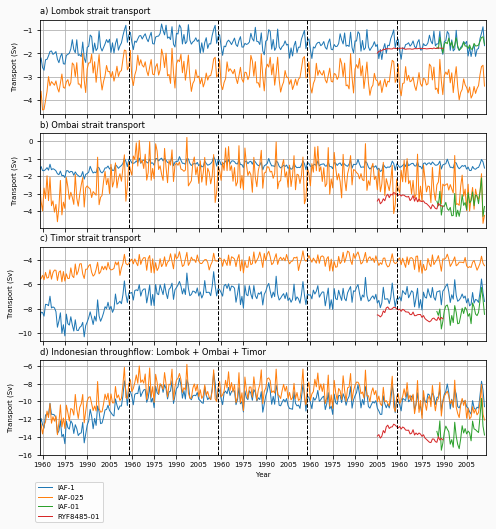

In [10]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

fig = plt.figure(1, figsize=(8,8), facecolor=[0.98,0.98,0.98]) 
# fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 7})    

# plt.suptitle(
#     r'SST 1993 to 2017 $\bf{linear\ trend}$ in ' +
#     '\n(a,b,c) the model and in (d) the observations',
#     x=0.2,y=1.025, ha='left')

row=4
col=1

ax = plt.subplot(row, col, 1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1, pos.y1]
print(pos_plot)
plt.plot(trans_Lombok_1.year, trans_Lombok_1, label='IAF-1', linewidth=1)
plt.plot(trans_Lombok_025.year, trans_Lombok_025, label='IAF-025', linewidth=1)
plt.plot(trans_Lombok_01.year, trans_Lombok_01, label='IAF-01', linewidth=1)
plt.plot(trans_Lombok_JRA.year, trans_Lombok_JRA, label='RYF8485-01', linewidth=1)
ax.set_position(bbox(pos_plot))
plt.grid()
plt.title('a) Lombok strait transport', loc='left')
plt.xticks(np.arange(1720,2020,15))
plt.xlim([1718,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)

ax = plt.subplot(row, col, 2)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1, pos.y1]
print(pos_plot)
plt.plot(trans_Ombai_1.year, trans_Ombai_1, label='IAF-1', linewidth=1)
plt.plot(trans_Ombai_025.year, trans_Ombai_025, label='IAF-025', linewidth=1)
plt.plot(trans_Ombai_01.year, trans_Ombai_01, label='IAF-01', linewidth=1)
plt.plot(trans_Ombai_JRA.year, trans_Ombai_JRA, label='RYF8485-01', linewidth=1)
ax.set_position(bbox(pos_plot))
plt.grid()
plt.title('b) Ombai strait transport', loc='left')
plt.xticks(np.arange(1720,2020,15))
plt.xlim([1718,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)

ax = plt.subplot(row, col, 3)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1, pos.y1]
print(pos_plot)
plt.plot(trans_Timor_1.year, trans_Timor_1, label='IAF-1', linewidth=1)
plt.plot(trans_Timor_025.year, trans_Timor_025, label='IAF-025', linewidth=1)
plt.plot(trans_Timor_01.year, trans_Timor_01, label='IAF-01', linewidth=1)
plt.plot(trans_Timor_JRA.year, trans_Timor_JRA, label='RYF8485-01', linewidth=1)
ax.set_position(bbox(pos_plot))
plt.grid()
plt.title('c) Timor strait transport', loc='left')
plt.xticks(np.arange(1720,2020,15))
plt.xlim([1718,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)

ax = plt.subplot(row, col, 4)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1, pos.y1]
print(pos_plot)
plt.plot(trans_ITF_1.year, trans_ITF_1, label='IAF-1', linewidth=1)
plt.plot(trans_ITF_025.year, trans_ITF_025, label='IAF-025', linewidth=1)
plt.plot(trans_ITF_01.year, trans_ITF_01, label='IAF-01', linewidth=1)
plt.plot(trans_ITF_JRA.year, trans_ITF_JRA, label='RYF8485-01', linewidth=1)
ax.set_position(bbox(pos_plot))
plt.grid()
plt.title('d) Indonesian throughflow: Lombok + Ombai + Timor', loc='left')
plt.xticks(np.arange(1720,2020,15))
plt.xlim([1718,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
# ax.set_xticklabels('')
plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)
plt.legend(bbox_to_anchor=(0.15,-0.25))
plt.gca().set_xticklabels([
    1960, 1975, 1990, 2005, 
    1960, 1975, 1990, 2005, 
    1960, 1975, 1990, 2005, 
    1960, 1975, 1990, 2005, 
    1960, 1975, 1990, 2005])

# savefigure('1')

Bbox(x0=0.125, y0=0.7158695652173913, x1=0.9, y1=0.88)
[0.125, 0.7158695652173913, 0.9, 0.88]
Bbox(x0=0.125, y0=0.5189130434782608, x1=0.9, y1=0.6830434782608695)
[0.125, 0.5189130434782608, 0.9, 0.6830434782608695]
Bbox(x0=0.125, y0=0.32195652173913036, x1=0.9, y1=0.4860869565217391)
[0.125, 0.32195652173913036, 0.9, 0.4860869565217391]
Bbox(x0=0.125, y0=0.12499999999999989, x1=0.9, y1=0.2891304347826086)
[0.125, 0.12499999999999989, 0.9, 0.2891304347826086]


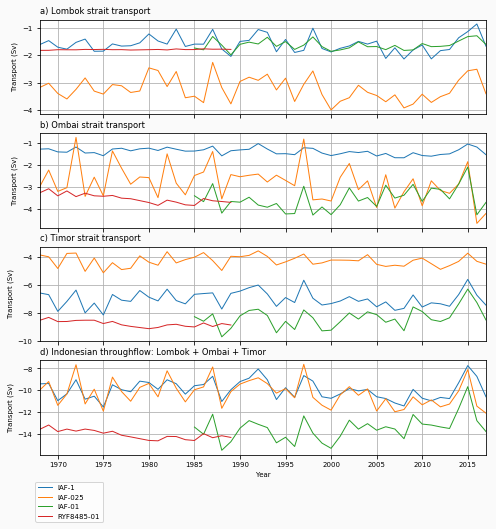

In [9]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

fig = plt.figure(1, figsize=(8,8), facecolor=[0.98,0.98,0.98]) 
# fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 7})    

# plt.suptitle(
#     r'SST 1993 to 2017 $\bf{linear\ trend}$ in ' +
#     '\n(a,b,c) the model and in (d) the observations',
#     x=0.2,y=1.025, ha='left')

row=4
col=1

ax = plt.subplot(row, col, 1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1, pos.y1]
print(pos_plot)
plt.plot(trans_Lombok_1.year.sel(year=slice(1958,2017)), 
         trans_Lombok_1.sel(year=slice(1958,2017)), label='IAF-1', linewidth=1)
plt.plot(trans_Lombok_025.year.sel(year=slice(1958,2017)), 
         trans_Lombok_025.sel(year=slice(1958,2017)), label='IAF-025', linewidth=1)
plt.plot(trans_Lombok_01.year.sel(year=slice(1958,2017)), 
         trans_Lombok_01.sel(year=slice(1958,2017)), label='IAF-01', linewidth=1)
plt.plot(trans_Lombok_JRA.year.sel(year=slice(1958,2017)), 
         trans_Lombok_JRA.sel(year=slice(1958,2017)), label='RYF8485-01', linewidth=1)
ax.set_position(bbox(pos_plot))
plt.grid()
plt.title('a) Lombok strait transport', loc='left')
plt.xticks(np.arange(1970,2020,5))
plt.xlim([1968,2017])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)

ax = plt.subplot(row, col, 2)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1, pos.y1]
print(pos_plot)
plt.plot(trans_Ombai_1.year.sel(year=slice(1958,2017)), 
         trans_Ombai_1.sel(year=slice(1958,2017)), label='IAF-1', linewidth=1)
plt.plot(trans_Ombai_025.year.sel(year=slice(1958,2017)), 
         trans_Ombai_025.sel(year=slice(1958,2017)), label='IAF-025', linewidth=1)
plt.plot(trans_Ombai_01.year.sel(year=slice(1958,2017)), 
         trans_Ombai_01.sel(year=slice(1958,2017)), label='IAF-01', linewidth=1)
plt.plot(trans_Ombai_JRA.year.sel(year=slice(1958,2017)), 
         trans_Ombai_JRA.sel(year=slice(1958,2017)), label='RYF8485-01', linewidth=1)
ax.set_position(bbox(pos_plot))
plt.grid()
plt.title('b) Ombai strait transport', loc='left')
plt.xticks(np.arange(1970,2020,5))
plt.xlim([1968,2017])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)

ax = plt.subplot(row, col, 3)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1, pos.y1]
print(pos_plot)
plt.plot(trans_Timor_1.year.sel(year=slice(1958,2017)), 
         trans_Timor_1.sel(year=slice(1958,2017)), label='IAF-1', linewidth=1)
plt.plot(trans_Timor_025.year.sel(year=slice(1958,2017)), 
         trans_Timor_025.sel(year=slice(1958,2017)), label='IAF-025', linewidth=1)
plt.plot(trans_Timor_01.year.sel(year=slice(1958,2017)), 
         trans_Timor_01.sel(year=slice(1958,2017)), label='IAF-01', linewidth=1)
plt.plot(trans_Timor_JRA.year.sel(year=slice(1958,2017)), 
         trans_Timor_JRA.sel(year=slice(1958,2017)), label='RYF8485-01', linewidth=1)
ax.set_position(bbox(pos_plot))
plt.grid()
plt.title('c) Timor strait transport', loc='left')
plt.xticks(np.arange(1970,2020,5))
plt.xlim([1968,2017])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)

ax = plt.subplot(row, col, 4)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1, pos.y1]
print(pos_plot)
plt.plot(trans_ITF_1.year.sel(year=slice(1958,2017)), 
         trans_ITF_1.sel(year=slice(1958,2017)), label='IAF-1', linewidth=1)
plt.plot(trans_ITF_025.year.sel(year=slice(1958,2017)), 
         trans_ITF_025.sel(year=slice(1958,2017)), label='IAF-025', linewidth=1)
plt.plot(trans_ITF_01.year.sel(year=slice(1958,2017)), 
         trans_ITF_01.sel(year=slice(1958,2017)), label='IAF-01', linewidth=1)
plt.plot(trans_ITF_JRA.year.sel(year=slice(1958,2017)), 
         trans_ITF_JRA.sel(year=slice(1958,2017)), label='RYF8485-01', linewidth=1)
ax.set_position(bbox(pos_plot))
plt.grid()
plt.title('d) Indonesian throughflow: Lombok + Ombai + Timor', loc='left')
plt.xticks(np.arange(1970,2020,5))
plt.xlim([1968,2017])
# plt.legend(bbox_to_anchor=(1.21,1))
# ax.set_xticklabels('')
plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.legend(bbox_to_anchor=(0.15,-0.25))
# plt.gca().set_xticklabels([
#     1960, 1975, 1990, 2005, 
#     1960, 1975, 1990, 2005, 
#     1960, 1975, 1990, 2005, 
#     1960, 1975, 1990, 2005, 
#     1960, 1975, 1990, 2005])

savefigure('2')